### I took a survey and asked multiple people a serious of questions and then checked if they prefer WFH or WFO. Using these same features I have tried to see how much my model can predict. The target column has the right output with which we will train our model. We then test the model and compare the actual and predicted values 

## OBJECTIVE : Based on the survey dataset, we try to find out wheter an employee working from Home or Office. AS post lockdown, WFH is the new normal, our survey will try to find employee reaction on how they feel about this change.

## Load imp  Libraries

In [138]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set()  
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [139]:
data = pd.read_csv('C:/Users/sneha/Desktop/CV PROJECTS/WFH vs WFO.zip')
data.head()

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [140]:
data.head(3)

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1


In [141]:
#Shape of the data i.e no. oof rows and columns
data.shape

(207, 19)

In [142]:
#All the columns name present in the dataset
data.columns

Index(['ID', 'Name', 'Age', 'Occupation', 'Gender',
       'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'calmer_stressed', 'RM_professional_growth',
       'RM_lazy', 'RM_productive', 'digital_connect_sufficient',
       'RM_better_work_life_balance', 'RM_improved_skillset',
       'RM_job_opportunities', 'Target'],
      dtype='object')

In [143]:
#looking into the datatypes of the columns present in the dataset
data.dtypes

ID                              int64
Name                           object
Age                             int64
Occupation                     object
Gender                         object
Same_ofiice_home_location      object
kids                           object
RM_save_money                  object
RM_quality_time                object
RM_better_sleep                object
calmer_stressed                object
RM_professional_growth          int64
RM_lazy                         int64
RM_productive                   int64
digital_connect_sufficient     object
RM_better_work_life_balance     int64
RM_improved_skillset            int64
RM_job_opportunities           object
Target                          int64
dtype: object

## Data Understanding and Visualization

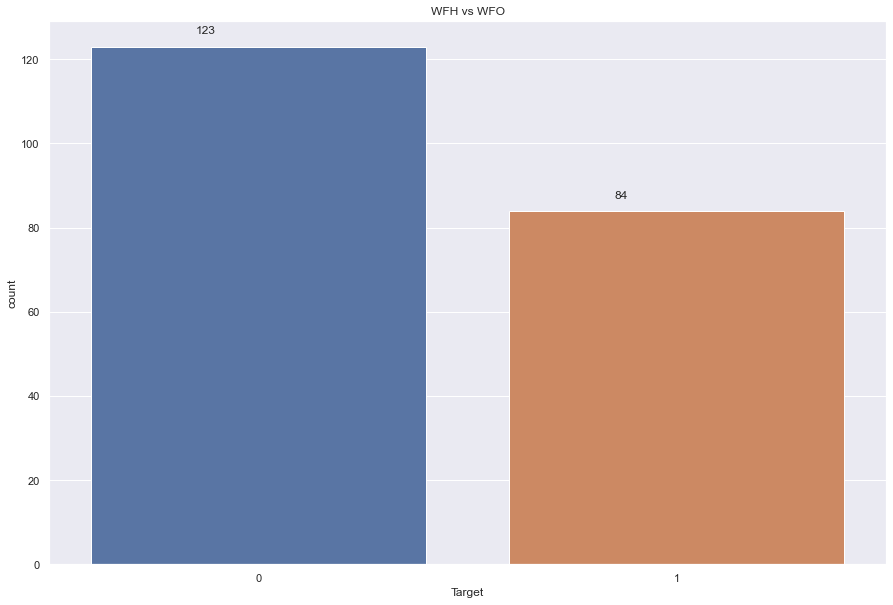

In [144]:
#WFH/remote -1
#WFO - 0
ax=sns.countplot(x='Target',data=data)
plt.title('WFH vs WFO')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

#### Here we can see that 123 people wants to go back to office and 84 people would like work from home to continue, according to the dataset we have collected.

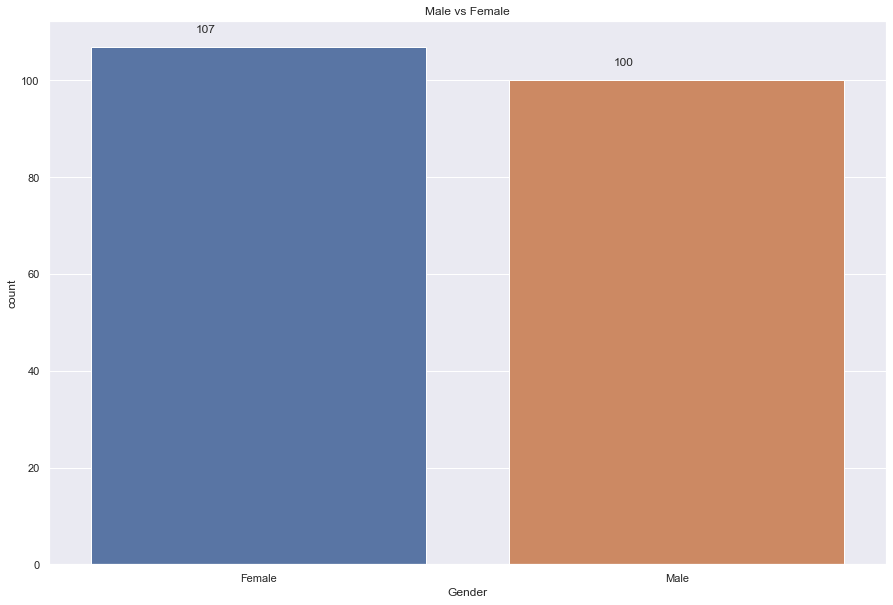

In [145]:
ax=sns.countplot(x='Gender',data=data)
plt.title('Male vs Female') 
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

#### We have a count of 107 Females and 100 Males 

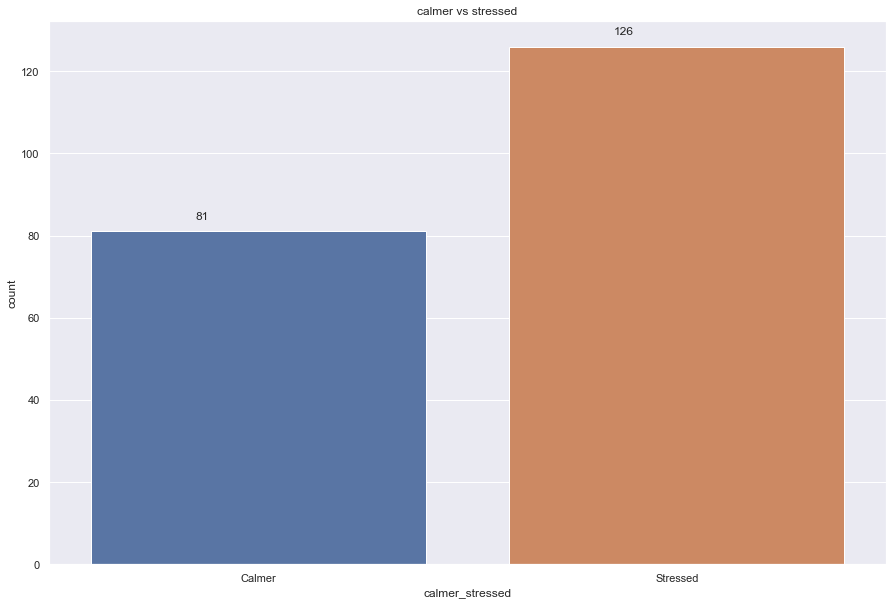

In [147]:
ax=sns.countplot(x='calmer_stressed',data=data)
plt.title('calmer vs stressed')
ax.set_xticklabels(['Calmer', 'Stressed'])
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 
plt.show() 

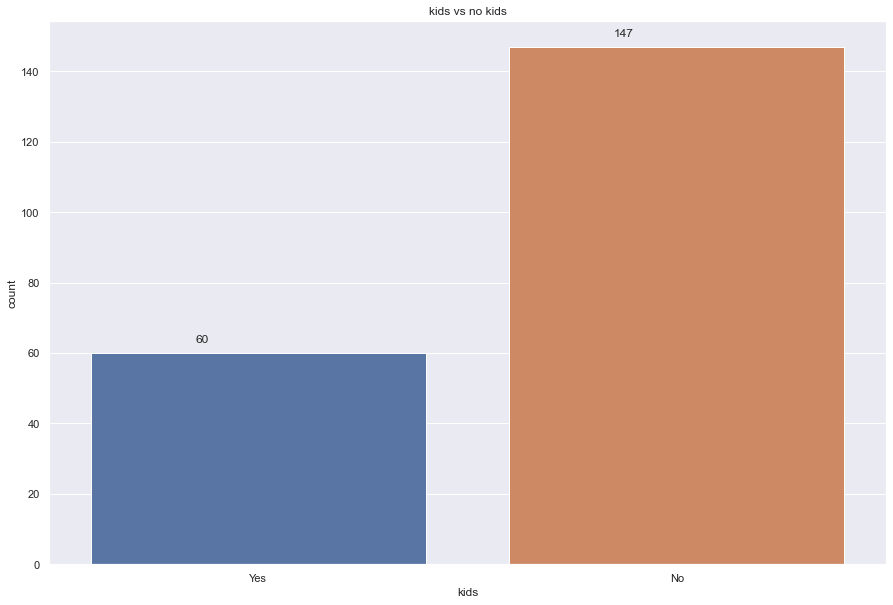

In [98]:
ax=sns.countplot(x='kids',data=data)
plt.title('kids vs no kids')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

#### Majority of the people in our data set does not have kids

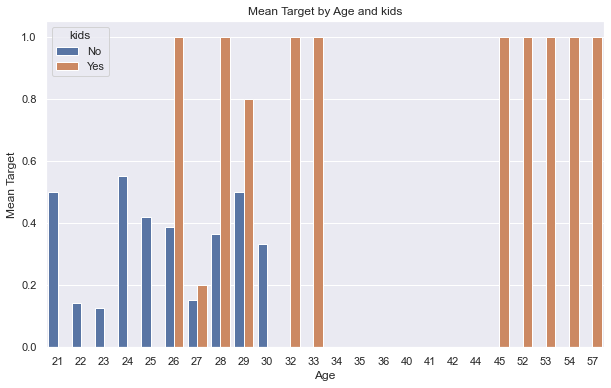

In [99]:
grouped_data = data.groupby(['Age', 'kids'])['Target'].mean().reset_index()

# Create a bar chart to represent the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Target', data=grouped_data, hue='kids')
plt.xlabel('Age')
plt.ylabel('Mean Target')
plt.title('Mean Target by Age and kids')
plt.show()

#### We can see that remote working has caused stress levels to increase for most people 

#### Most people have said that WFH has made them more productive

#### The below graphs gives the count of people in each occupation 

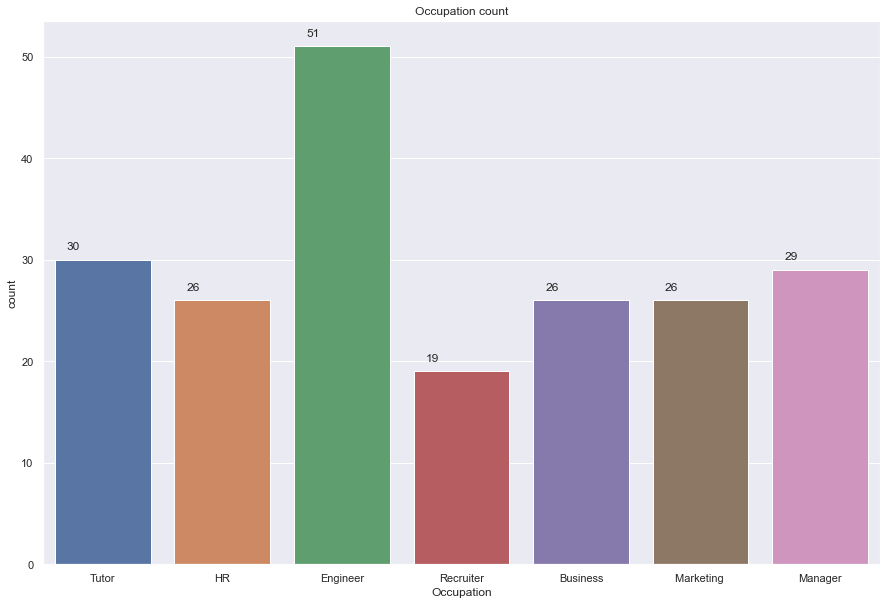

In [100]:
ax=sns.countplot(x='Occupation',data=data)
plt.title("Occupation count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 

In [101]:
data.describe()

,ID,Age,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,Target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,104.000000,29.666667,3.086957,3.101449,3.623188,3.043478,3.521739,0.405797
std,59.899917,8.506993,1.089301,1.255801,0.996617,1.247539,1.004002,0.492236
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,52.500000,25.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,104.000000,26.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.000000
75%,155.500000,29.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,207.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [102]:
data.corr()

,ID,Age,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,Target
ID,1.000000,0.028941,0.008630,0.005163,0.073266,-0.031896,0.009928,-0.015311
Age,0.028941,1.000000,0.009429,-0.244466,0.219294,0.407092,0.022734,0.180846
RM_professional_growth,0.008630,0.009429,1.000000,0.206439,-0.036744,-0.335006,-0.401215,0.015351
RM_lazy,0.005163,-0.244466,0.206439,1.000000,-0.341661,-0.272403,-0.076836,-0.255395
RM_productive,0.073266,0.219294,-0.036744,-0.341661,1.000000,0.352921,0.226541,0.194465
RM_better_work_life_balance,-0.031896,0.407092,-0.335006,-0.272403,0.352921,1.000000,0.156205,0.398003
RM_improved_skillset,0.009928,0.022734,-0.401215,-0.076836,0.226541,0.156205,1.000000,-0.017937
Target,-0.015311,0.180846,0.015351,-0.255395,0.194465,0.398003,-0.017937,1.000000


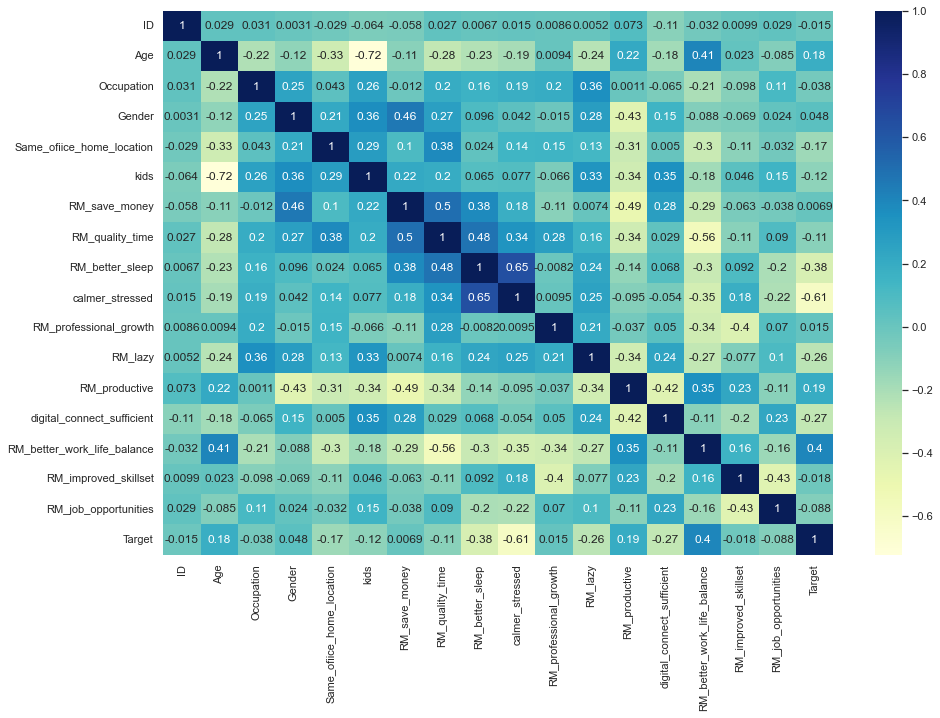

In [103]:
#CORRELATION CHART
data_aux=data
ls = ['Occupation', 'Gender',
       'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'calmer_stressed', 'digital_connect_sufficient', 'RM_job_opportunities']
for i in ls:
    unique_vals = data_aux[i].unique()
    data_aux[i].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

corrMatrix = data_aux.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrMatrix,cmap="YlGnBu",annot=True)
plt.show()

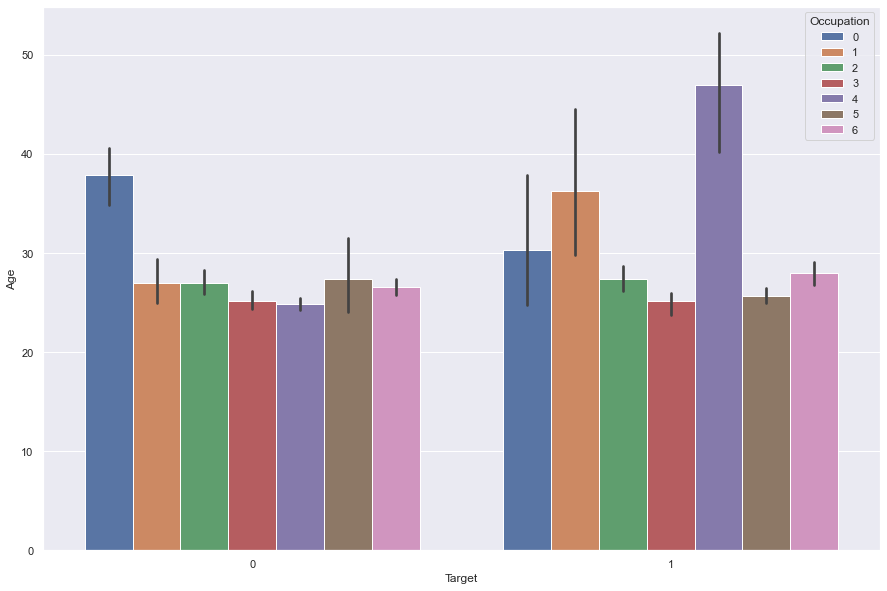

In [104]:
#Average age by role, separated based on whether they like to work from home or in the office.
ax = sns.barplot(x="Target", y="Age", hue="Occupation", data=data)
plt.show()

In [105]:
#Splitting data into two groups: one WFO and other WFH and then lookings int each aspects again for better understanding
data_wfh = data.loc[data['Target']==1]
data_wfo = data.loc[data['Target']==0]

# WFO

In [106]:
data_wfo.shape

(123, 19)

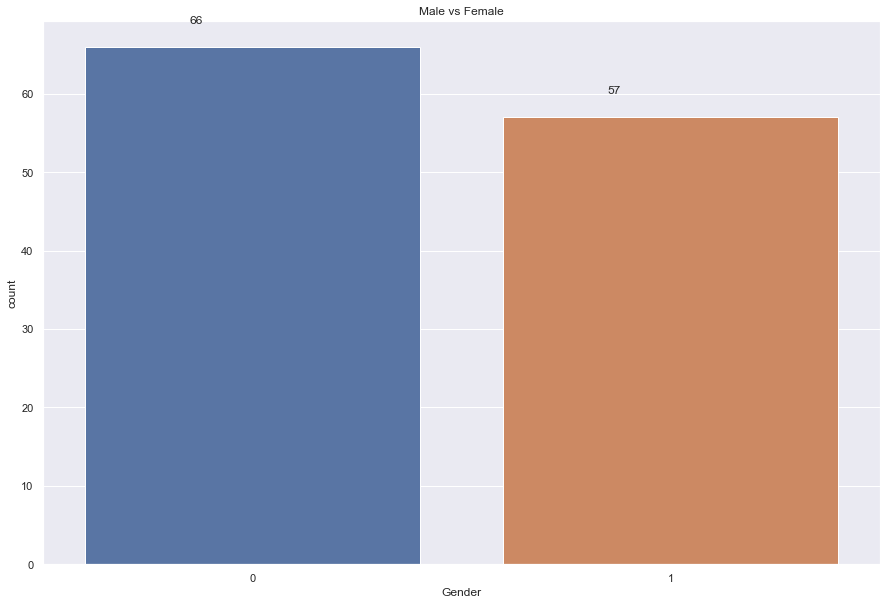

In [148]:
ax=sns.countplot(x='Gender',data=data_wfo)
plt.title('Male vs Female') 
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

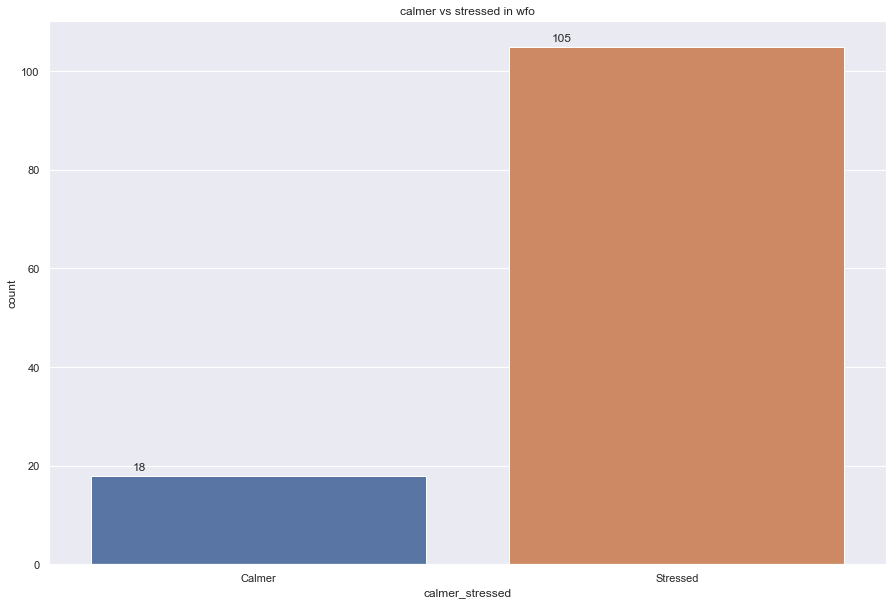

In [107]:
ax=sns.countplot(x='calmer_stressed',data=data_wfo)
plt.title('calmer vs stressed in wfo')
ax.set_xticklabels(['Calmer', 'Stressed'])

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 
plt.show() 

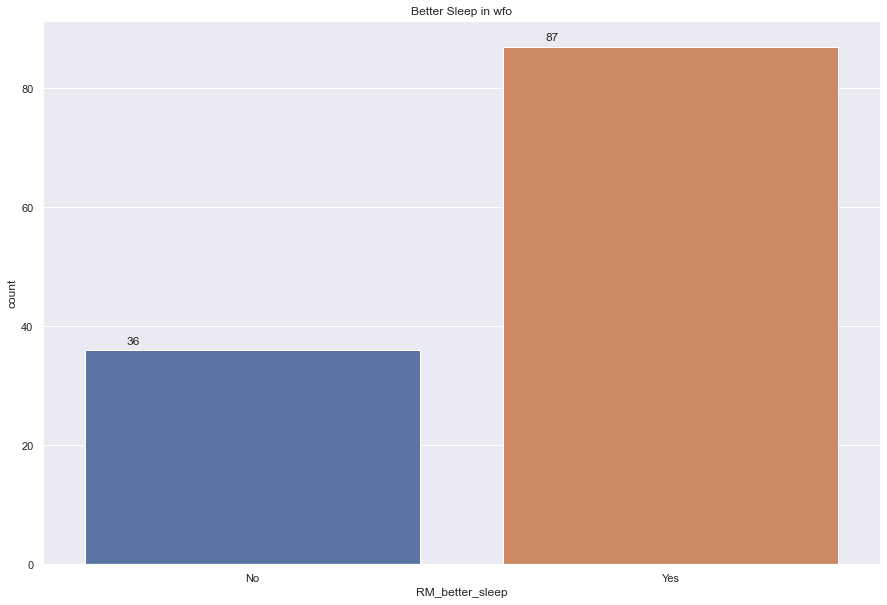

In [108]:
ax=sns.countplot(x='RM_better_sleep',data=data_wfo)
plt.title('Better Sleep in wfo')
ax.set_xticklabels(['No', 'Yes'])

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 
plt.show()

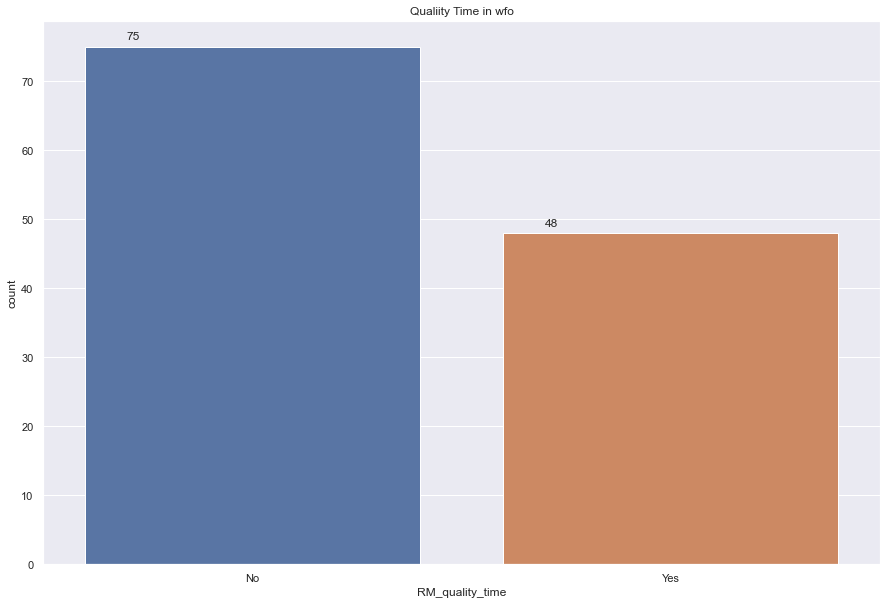

In [109]:
ax=sns.countplot(x='RM_quality_time',data=data_wfo)
plt.title('Qualiity Time in wfo')
ax.set_xticklabels(['No', 'Yes'])

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 
plt.show()

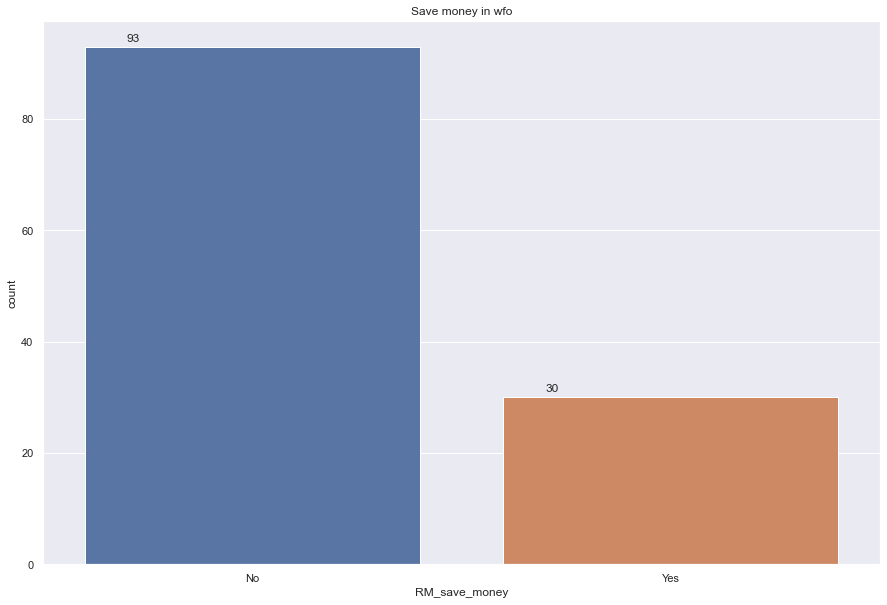

In [110]:
ax=sns.countplot(x='RM_save_money',data=data_wfo)
plt.title('Save money in wfo')
ax.set_xticklabels(['No', 'Yes'])

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 
plt.show() 

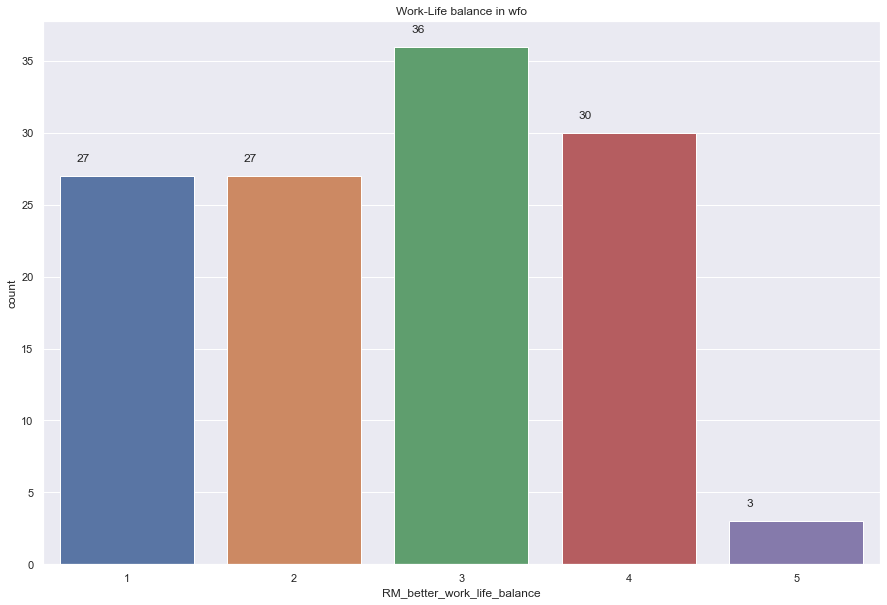

In [111]:
ax=sns.countplot(x='RM_better_work_life_balance',data=data_wfo)
plt.title('Work-Life balance in wfo')

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 

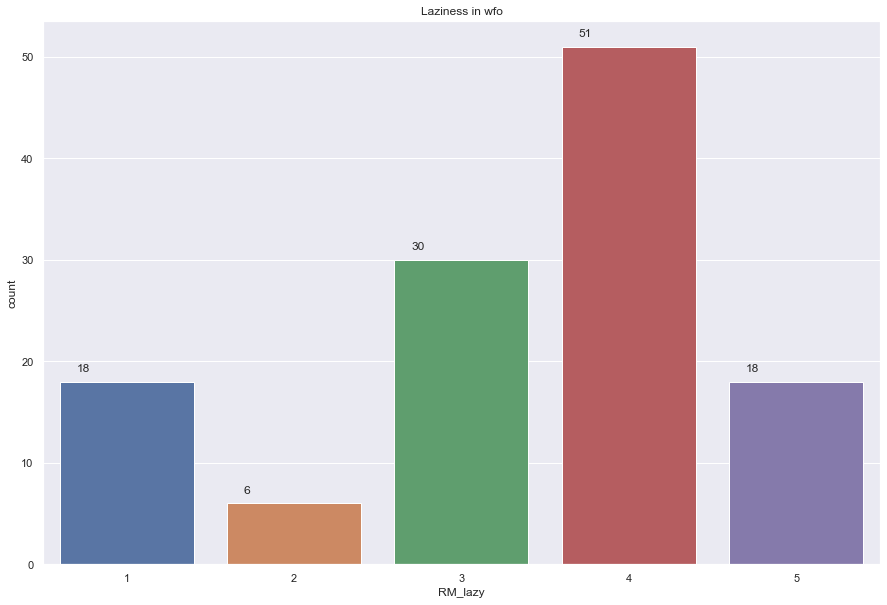

In [112]:
ax=sns.countplot(x='RM_lazy',data=data_wfo)
plt.title('Laziness in wfo')

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 

Text(0.5, 1.0, 'Productivity in wfo')

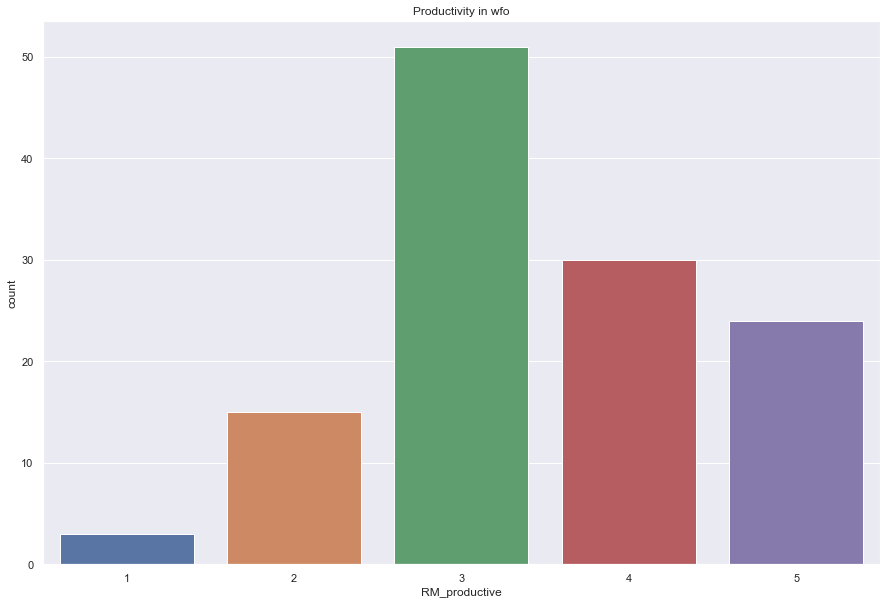

In [113]:
ax=sns.countplot(x='RM_productive',data=data_wfo)
plt.title('Productivity in wfo')

## Conclusion in WFO: We see among employee working from Office, 
## 1. Majority are stressed
## 2. Having better sleep
## 3. And moderate work-life balance

# WFH

In [114]:
data_wfh.shape

(84, 19)

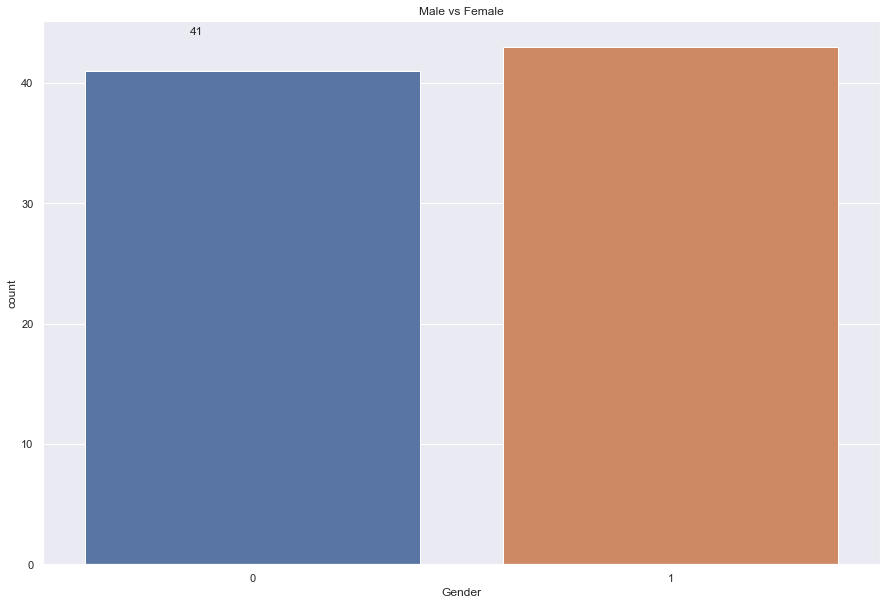

In [149]:
ax=sns.countplot(x='Gender',data=data_wfh)
plt.title('Male vs Female') 
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

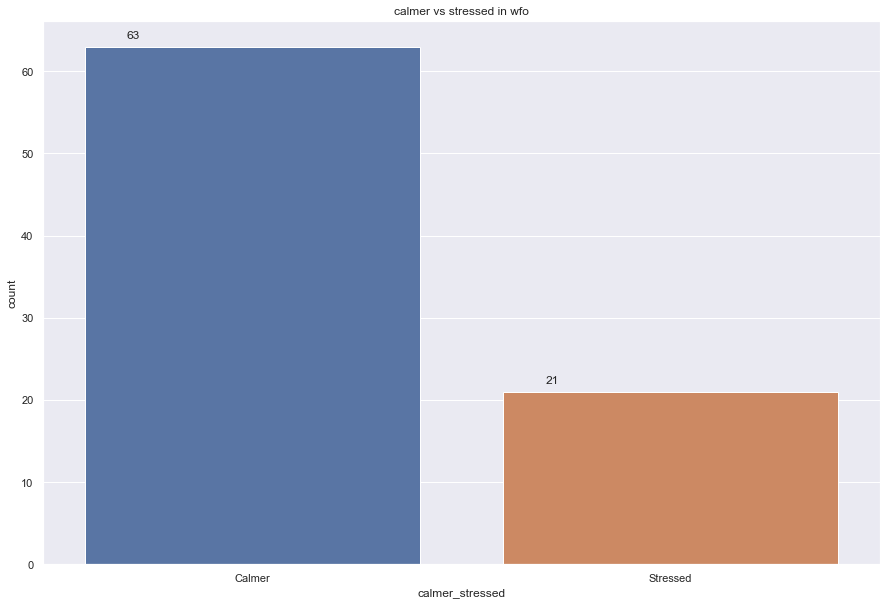

In [150]:
ax=sns.countplot(x='calmer_stressed',data=data_wfh)
plt.title('calmer vs stressed in wfo')
ax.set_xticklabels(['Calmer', 'Stressed'])

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 
plt.show()

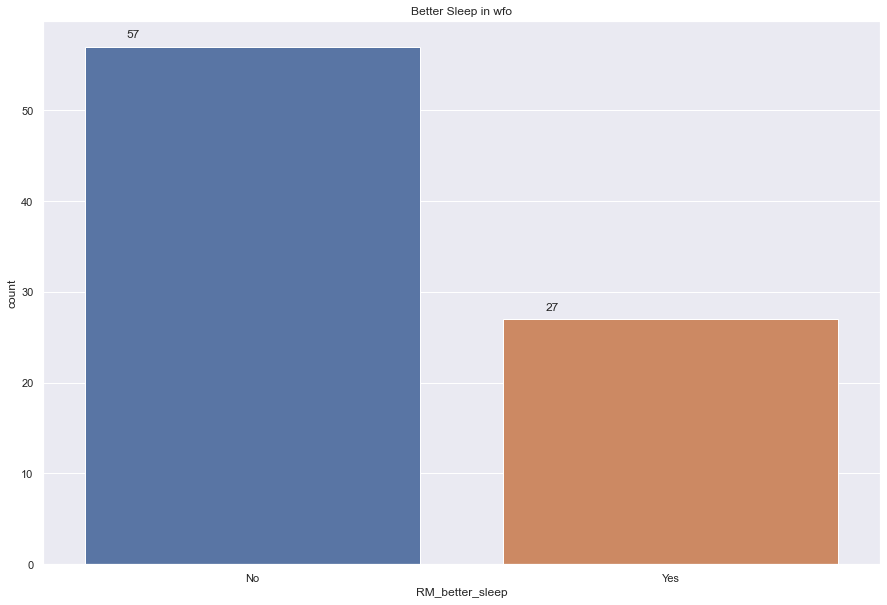

In [151]:
ax=sns.countplot(x='RM_better_sleep',data=data_wfh)
plt.title('Better Sleep in wfo')
ax.set_xticklabels(['No', 'Yes'])

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 
plt.show() 

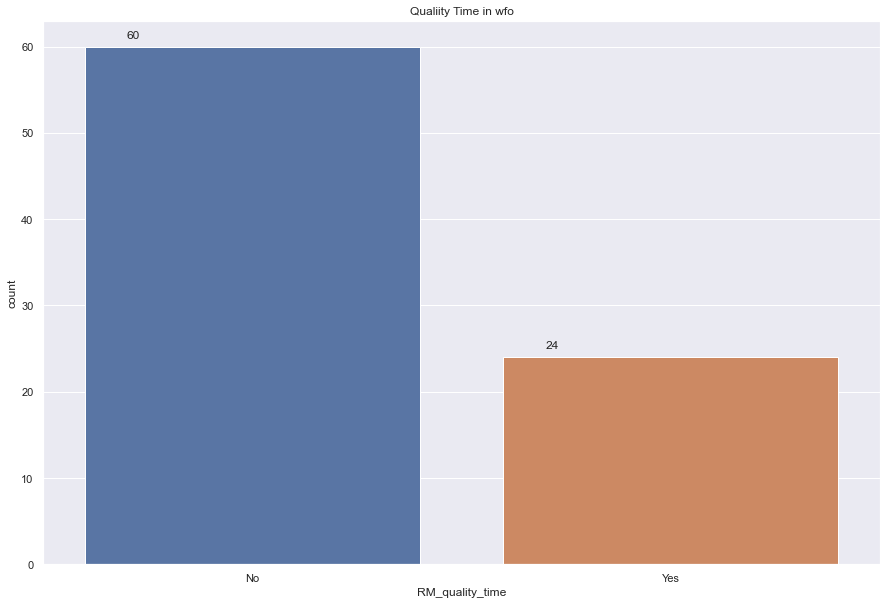

In [152]:
ax=sns.countplot(x='RM_quality_time',data=data_wfh)
plt.title('Qualiity Time in wfo')
ax.set_xticklabels(['No', 'Yes'])

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 
plt.show() 

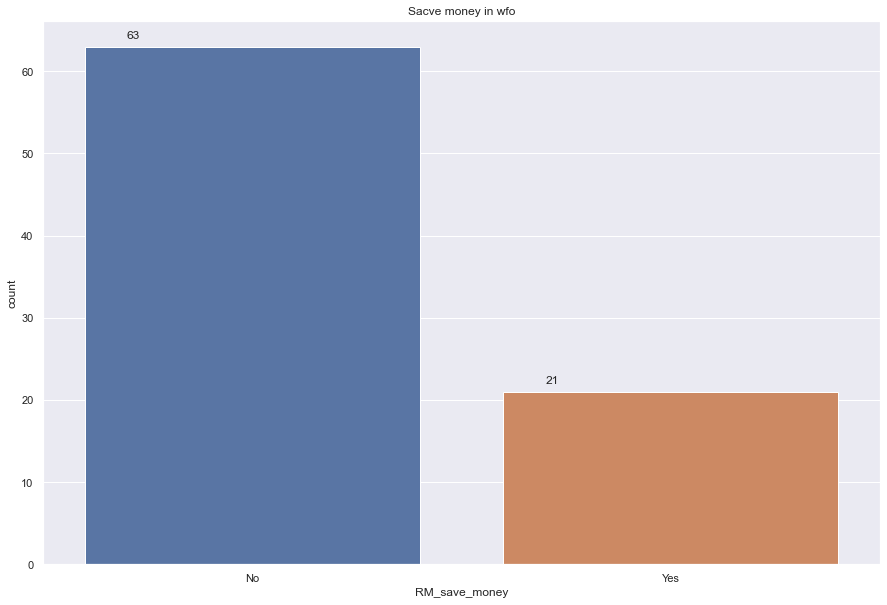

In [153]:
ax=sns.countplot(x='RM_save_money',data=data_wfh)
plt.title('Save money in wfo')
ax.set_xticklabels(['No', 'Yes'])

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 
plt.show() 

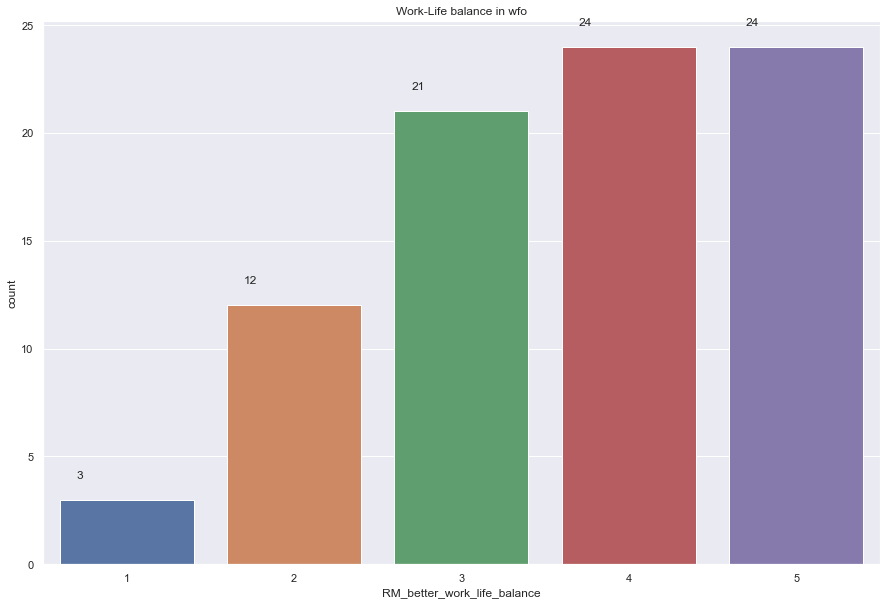

In [154]:
ax=sns.countplot(x='RM_better_work_life_balance',data=data_wfh)
plt.title('Work-Life balance in wfo')

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 

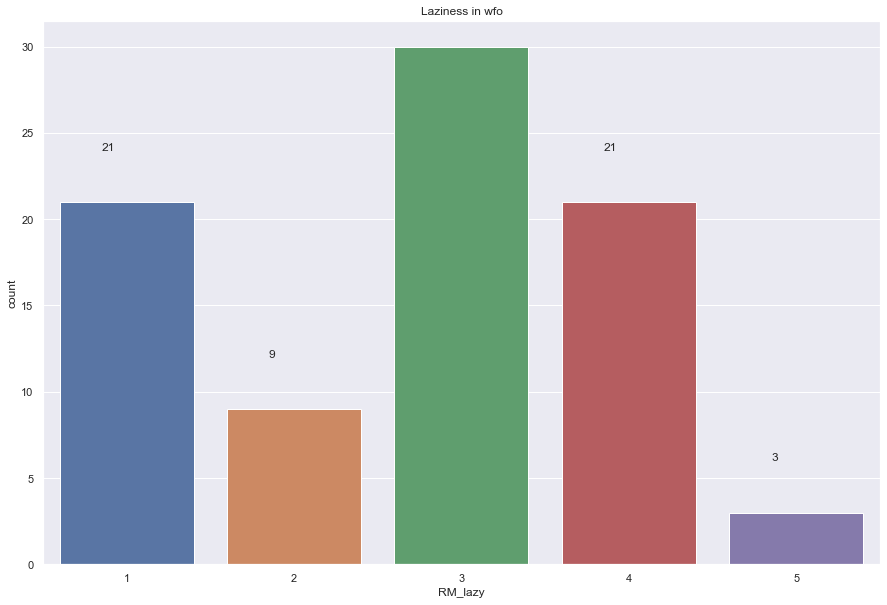

In [155]:
ax=sns.countplot(x='RM_lazy',data=data_wfh)
plt.title('Laziness in wfo')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3))

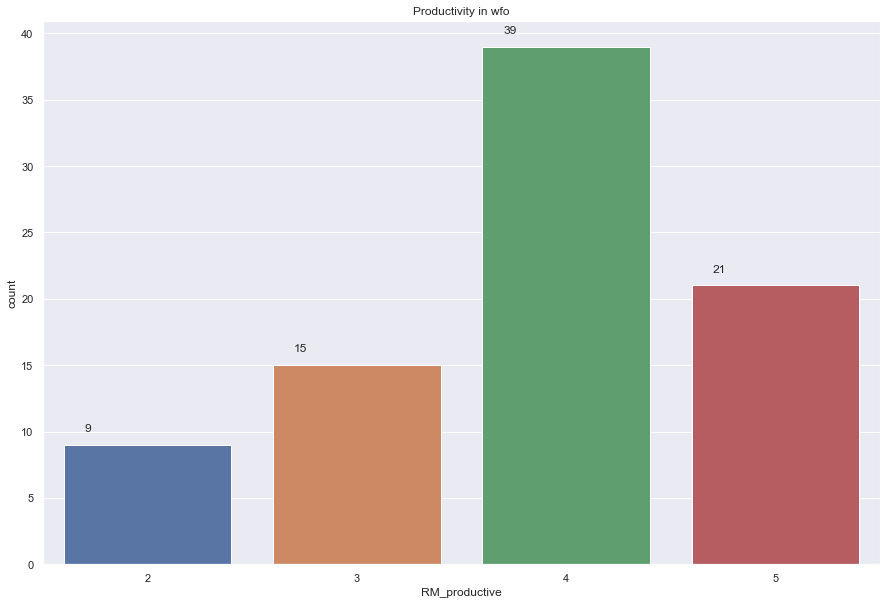

In [156]:
ax=sns.countplot(x='RM_productive',data=data_wfh)
plt.title('Productivity in wfo')

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 

## Conclusion in WFH: Here we see, employees in WFH environment are,
## 1. Having less stress
## 2. But not getting better sleep
## 3. However having slightly better work-life balance

# DATA PRE-PROCESSING

## Check for null values

In [157]:
# Method 1
data.info() # no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           207 non-null    int64 
 1   Name                         207 non-null    object
 2   Age                          207 non-null    int64 
 3   Occupation                   207 non-null    object
 4   Gender                       207 non-null    object
 5   Same_ofiice_home_location    207 non-null    object
 6   kids                         207 non-null    object
 7   RM_save_money                207 non-null    object
 8   RM_quality_time              207 non-null    object
 9   RM_better_sleep              207 non-null    object
 10  calmer_stressed              207 non-null    object
 11  RM_professional_growth       207 non-null    int64 
 12  RM_lazy                      207 non-null    int64 
 13  RM_productive                207 no

In [158]:
#Method 2
data.isnull().sum() #no null

ID                             0
Name                           0
Age                            0
Occupation                     0
Gender                         0
Same_ofiice_home_location      0
kids                           0
RM_save_money                  0
RM_quality_time                0
RM_better_sleep                0
calmer_stressed                0
RM_professional_growth         0
RM_lazy                        0
RM_productive                  0
digital_connect_sufficient     0
RM_better_work_life_balance    0
RM_improved_skillset           0
RM_job_opportunities           0
Target                         0
dtype: int64

# Check for categorical data

In [161]:
data.dtypes

ID                              int64
Name                           object
Age                             int64
Occupation                     object
Gender                         object
Same_ofiice_home_location      object
kids                           object
RM_save_money                  object
RM_quality_time                object
RM_better_sleep                object
calmer_stressed                object
RM_professional_growth          int64
RM_lazy                         int64
RM_productive                   int64
digital_connect_sufficient     object
RM_better_work_life_balance     int64
RM_improved_skillset            int64
RM_job_opportunities           object
Target                          int64
dtype: object

In [159]:
data.nunique()

ID                             207
Name                           173
Age                             24
Occupation                       7
Gender                           2
Same_ofiice_home_location        3
kids                             2
RM_save_money                    2
RM_quality_time                  2
RM_better_sleep                  2
calmer_stressed                  2
RM_professional_growth           5
RM_lazy                          5
RM_productive                    5
digital_connect_sufficient       2
RM_better_work_life_balance      5
RM_improved_skillset             5
RM_job_opportunities             3
Target                           2
dtype: int64

# Dummy variables

#### Get dummy values for Gender and calmer_stressed column

In [162]:
# 1. Gender

gender=pd.get_dummies(data['Gender'],drop_first=True)
gender.head()
#FEMALE=0,MALE=1

,Male
0,0
1,1
2,0
3,0
4,1


In [163]:
# 2. Stress

calm_stress=pd.get_dummies(data['calmer_stressed'],drop_first=True)
calm_stress.head()

,STRESSED
0,0
1,0
2,0
3,1
4,1


In [164]:
data=pd.concat([data,gender,calm_stress],axis=1)
data.drop(['Gender','calmer_stressed'],axis=1,inplace=True)

In [165]:
data.head(5)

,ID,Name,Age,Occupation,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Male,STRESSED
0,1,Bhavana,45,Tutor,Yes,Yes,Yes,Yes,Yes,5,1,5,Yes,5,5,Yes,1,0,0
1,2,Harry,24,Tutor,No,No,No,No,No,2,2,2,No,3,3,No,1,1,0
2,3,Banditaa,53,HR,Yes,Yes,Yes,Yes,Yes,3,3,4,No,5,3,No,1,0,0
3,4,Neetha,26,Engineer,Yes,No,Yes,Yes,No,3,4,4,No,4,5,Yes,0,0,1
4,5,Ram,26,Recruiter,Yes,No,No,Yes,No,3,3,5,Yes,4,2,Yes,1,1,1


In [166]:
data.dtypes

ID                              int64
Name                           object
Age                             int64
Occupation                     object
Same_ofiice_home_location      object
kids                           object
RM_save_money                  object
RM_quality_time                object
RM_better_sleep                object
RM_professional_growth          int64
RM_lazy                         int64
RM_productive                   int64
digital_connect_sufficient     object
RM_better_work_life_balance     int64
RM_improved_skillset            int64
RM_job_opportunities           object
Target                          int64
Male                            uint8
STRESSED                        uint8
dtype: object

### for the YES and NO columns, map yes to 1 and No to 0

In [186]:
#first fetch all the categorical columns with Yes and NO
categorical =  ['Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep', 'digital_connect_sufficient','RM_job_opportunities']

#write a function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# now replace yes and no with 1 and 0 in our dataset
data[categorical] = data[categorical].apply(binary_map)

In [187]:
data.head()

,ID,Name,Age,Occupation,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Male,STRESSED
0,1,Bhavana,45,Tutor,1.0,1,1,1,1,5,1,5,1,5,5,1.0,1,0,0
1,2,Harry,24,Tutor,0.0,0,0,0,0,2,2,2,0,3,3,0.0,1,1,0
2,3,Banditaa,53,HR,1.0,1,1,1,1,3,3,4,0,5,3,0.0,1,0,0
3,4,Neetha,26,Engineer,1.0,0,1,1,0,3,4,4,0,4,5,1.0,0,0,1
4,5,Ram,26,Recruiter,1.0,0,0,1,0,3,3,5,1,4,2,1.0,1,1,1


In [188]:
data = data.dropna(subset=['Same_ofiice_home_location','RM_job_opportunities'])
data['Same_ofiice_home_location'] = data['Same_ofiice_home_location'].astype(int)  # this column was coming as float
data['RM_job_opportunities'] = data['RM_job_opportunities'].astype(int) # this column was coming as float


data.dtypes

ID                              int64
Name                           object
Age                             int64
Occupation                     object
Same_ofiice_home_location       int32
kids                            int64
RM_save_money                   int64
RM_quality_time                 int64
RM_better_sleep                 int64
RM_professional_growth          int64
RM_lazy                         int64
RM_productive                   int64
digital_connect_sufficient      int64
RM_better_work_life_balance     int64
RM_improved_skillset            int64
RM_job_opportunities            int32
Target                          int64
Male                            uint8
STRESSED                        uint8
dtype: object

## Split data into train and test

In [201]:
drop_columns=['ID','Name','Occupation','Target']
x=data.drop(columns=drop_columns)
y=data['Target']

In [191]:
x.head()

,Age,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Male,STRESSED
0,45,1,1,1,1,1,5,1,5,1,5,5,1,0,0
1,24,0,0,0,0,0,2,2,2,0,3,3,0,1,0
2,53,1,1,1,1,1,3,3,4,0,5,3,0,0,0
3,26,1,0,1,1,0,3,4,4,0,4,5,1,0,1
4,26,1,0,0,1,0,3,3,5,1,4,2,1,1,1


In [192]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Target, dtype: int64

In [193]:
from sklearn.model_selection import train_test_split
np.random.seed(0) #so data can have same values
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=5)


## Train the model

In [194]:
from sklearn.linear_model import LogisticRegression


In [195]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

## Predict WFH or WFO using test data

In [196]:
pred=model.predict(x_test)

## Check accuracy

In [197]:
y_test.shape
#y_test_matrix = y_test.values.reshape(-1,1)

(24,)

In [198]:
dframe=pd.DataFrame({'actual':y_test,'Predicted':pred})
dframe.head(20)

,actual,Predicted
125,0,0
101,1,1
68,0,0
15,1,0
144,0,0
42,0,0
98,1,1
74,1,1
95,0,0
128,0,0


In [199]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.89      0.80      0.84        10

    accuracy                           0.88        24
   macro avg       0.88      0.86      0.87        24
weighted avg       0.88      0.88      0.87        24



[[13  1]
 [ 2  8]]


#### This shows an accuracy of 88%. 21 values we predicted correctly and 3 values were incorrect

In [200]:
import math
from sklearn import metrics

#metrics to find accuracy of continous variables
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,pred))
print('Mean squared value:',metrics.mean_squared_error(y_test,pred))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Abs value: 0.125
Mean squared value: 0.125
root mean squared error value: 0.3535533905932738
